Using device: cuda
Starting training of all models...

==================== Training alexnet ====================
Training alexnet with hyperparameters: {'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 0.0005}
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10
----------
Batch 0, Loss: 2.3025, Acc: 8.59%
Batch 100, Loss: 1.8696, Acc: 18.12%
Batch 200, Loss: 1.8955, Acc: 21.87%
Batch 300, Loss: 1.6605, Acc: 25.65%
Train Loss: 1.8672
Val Loss: 1.5607, Val Acc: 39.94%
New best model saved with accuracy: 39.94%
Epoch 2/10
----------
Batch 0, Loss: 1.5558, Acc: 42.19%
Batch 100, Loss: 1.6131, Acc: 39.98%
Batch 200, Loss: 1.6035, Acc: 41.18%
Batch 300, Loss: 1.5761, Acc: 42.10%
Train Loss: 1.5057
Val Loss: 1.3394, Val Acc: 50.74%
New best model saved with accuracy: 50.74%
Epoch 3/10
----------
Batch 0, Loss: 1.5581, Acc: 49.22%
Batch 100, Loss: 1.2547, Acc: 49.47%
Batch 200, Loss: 1.3571, Acc: 50.10%
Batch 300, Loss: 1.3707, Acc: 50.96%
Train Lo

/home/teaching/group41/miniconda3/envs/acv/lib/python3.10/site-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Error training googlenet: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not GoogLeNetOutputs
Skipping googlenet and continuing with next model...

==================== Training resnet152 ====================
Training resnet152 with hyperparameters: {'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 0.0005}
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10
----------
Batch 0, Loss: 2.3078, Acc: 11.72%
Batch 100, Loss: 1.8015, Acc: 24.09%
Batch 200, Loss: 1.8164, Acc: 29.75%
Batch 300, Loss: 1.4714, Acc: 33.54%
Train Loss: 1.7459
Val Loss: 1.6021, Val Acc: 44.42%
New best model saved with accuracy: 44.42%
Epoch 2/10
----------
Batch 0, Loss: 1.4961, Acc: 46.88%
Batch 100, Loss: 1.2224, Acc: 50.11%
Batch 200, Loss: 1.1667, Acc: 51.41%
Batch 300, Loss: 1.0941, Acc: 53.00%
Train Loss: 1.2461
Val Loss: 1.1448, Val Acc: 59.61%
New best model saved with accuracy: 59.61%
Epoch 3/10
----------
Batch 0, Loss: 1.0309, Acc: 67.97%


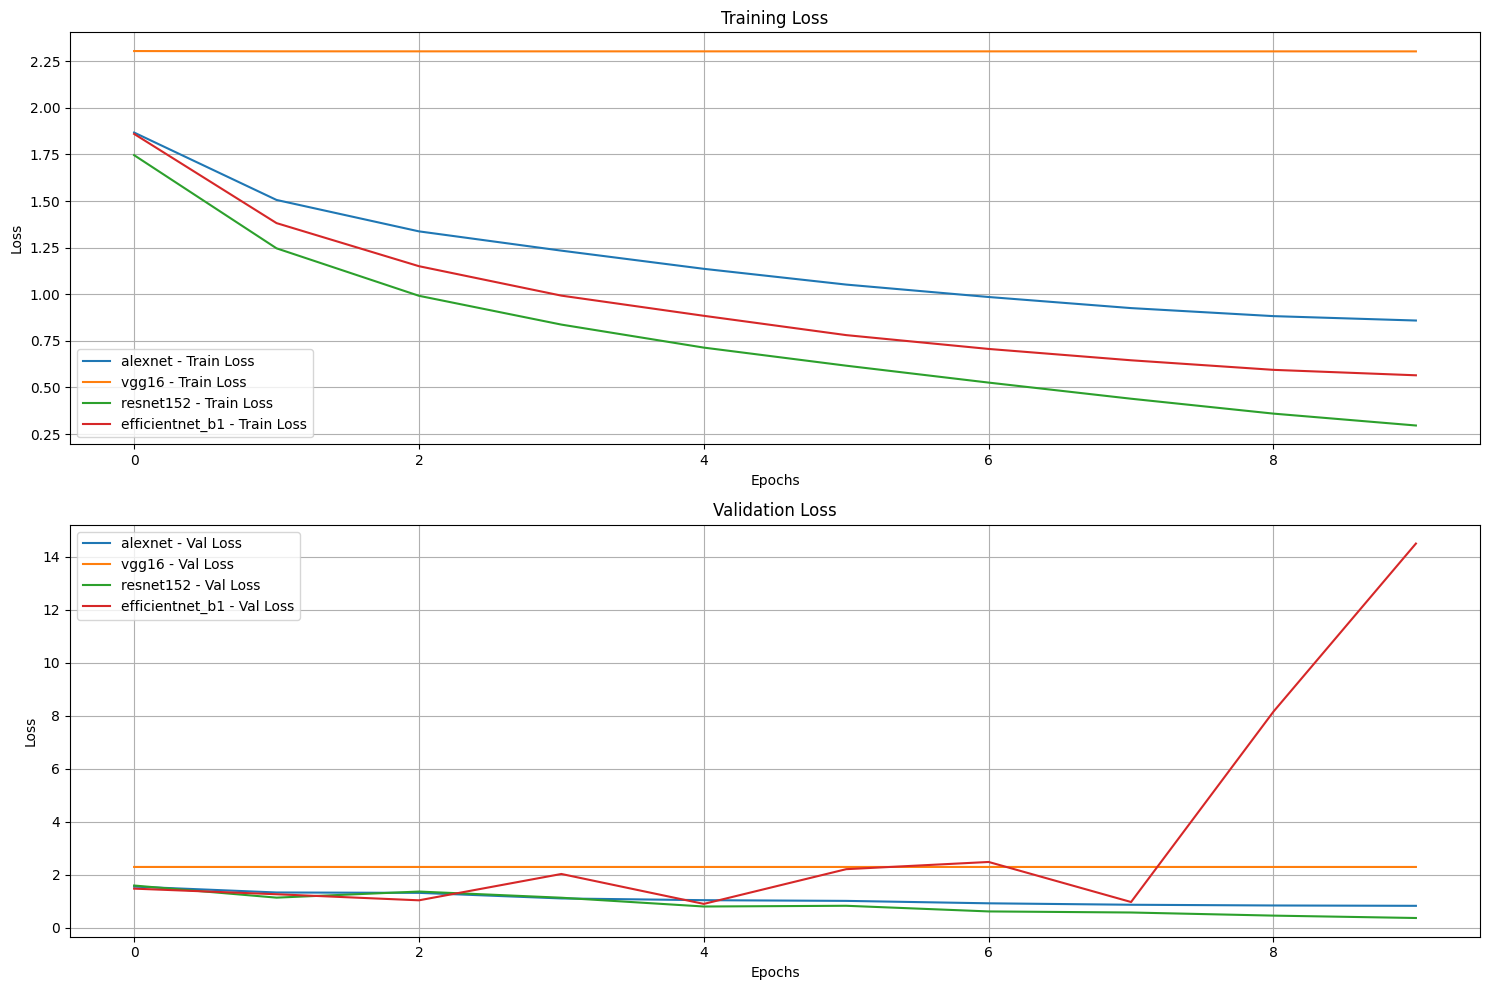

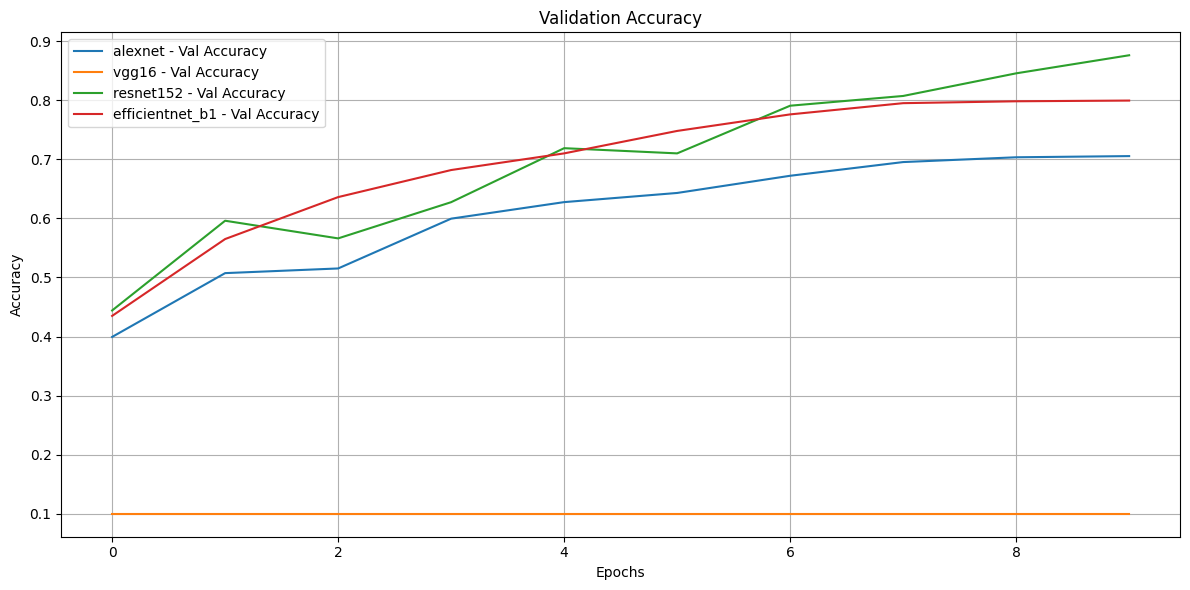


=== Model Performance Analysis ===

--- alexnet Analysis ---
Best epoch: 9
Best validation accuracy: 0.7055
Training loss at best epoch: 0.8589
Validation loss at best epoch: 0.8358
Model doesn't show strong signs of overfitting


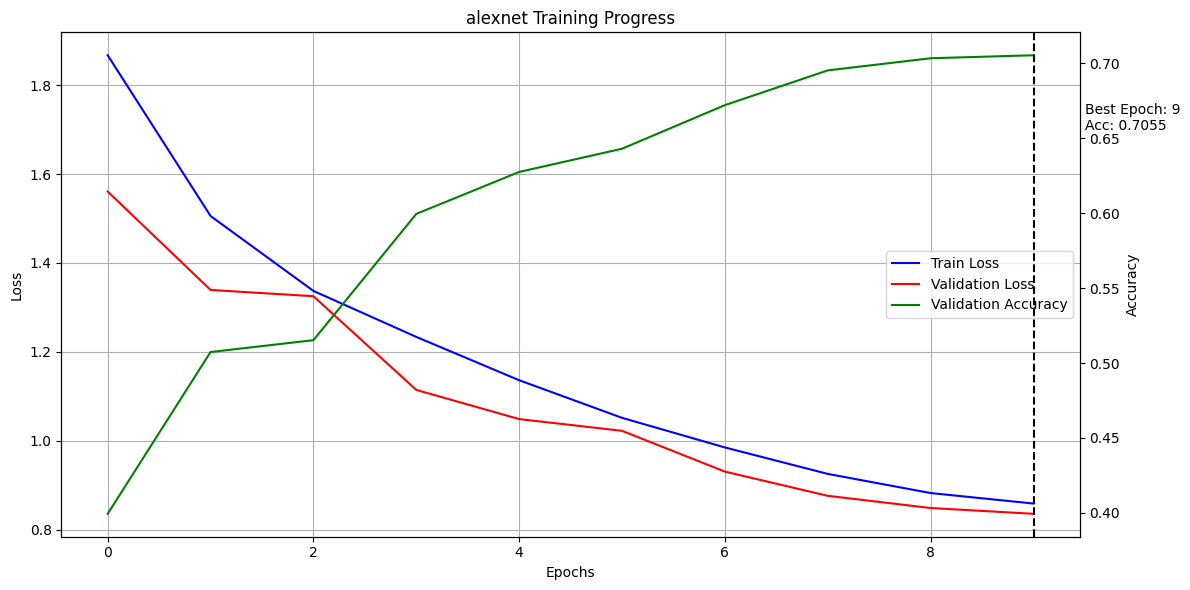


--- vgg16 Analysis ---
Best epoch: 0
Best validation accuracy: 0.1000
Training loss at best epoch: 2.3043
Validation loss at best epoch: 2.3028
Model doesn't show strong signs of overfitting


/tmp/ipykernel_145183/4129043113.py:471: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


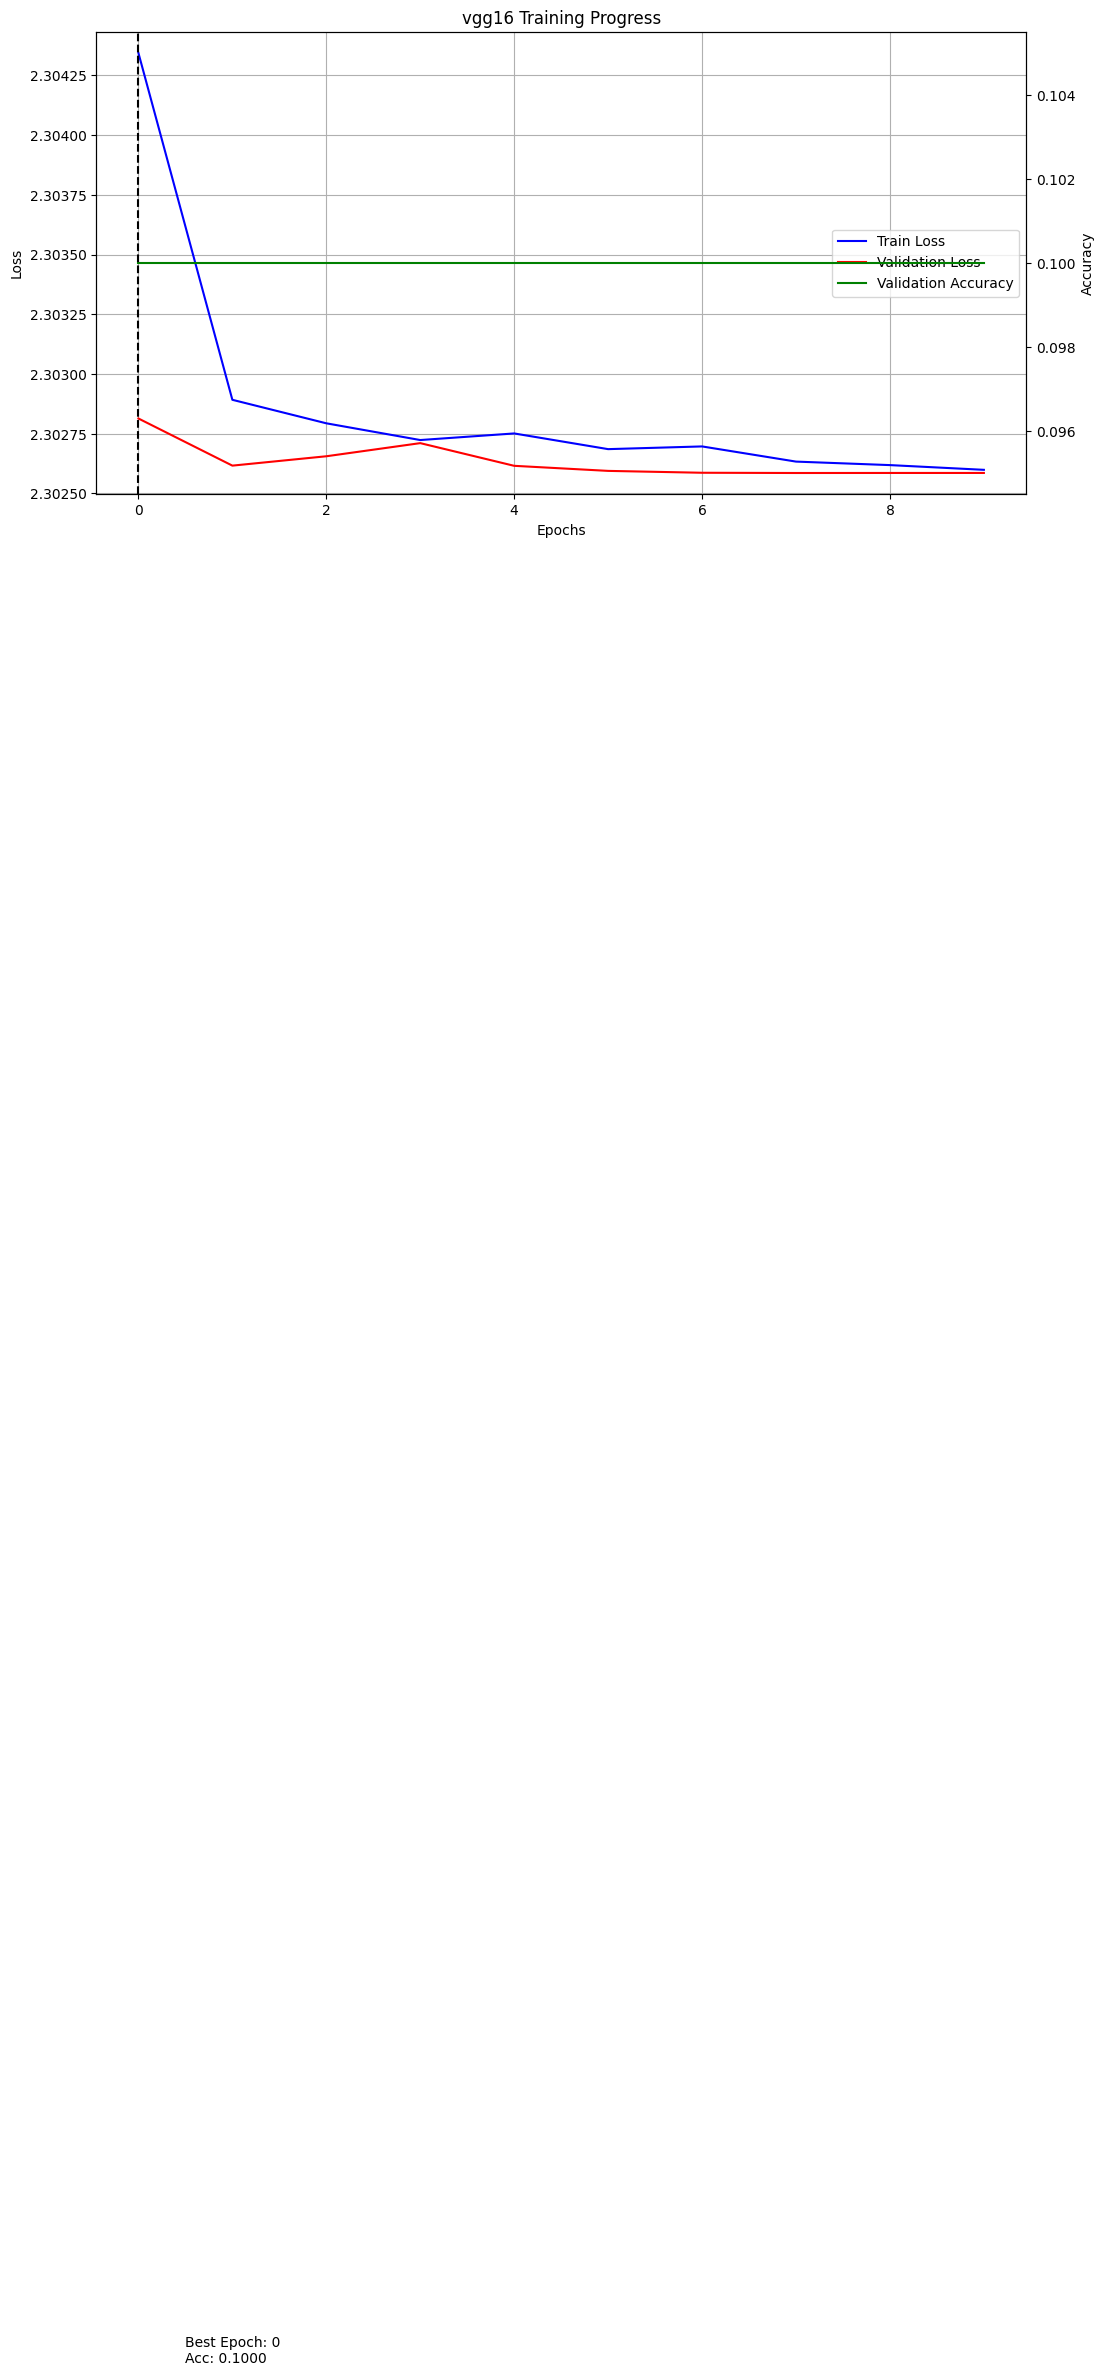


--- resnet152 Analysis ---
Best epoch: 9
Best validation accuracy: 0.8762
Training loss at best epoch: 0.2958
Validation loss at best epoch: 0.3764
Model doesn't show strong signs of overfitting


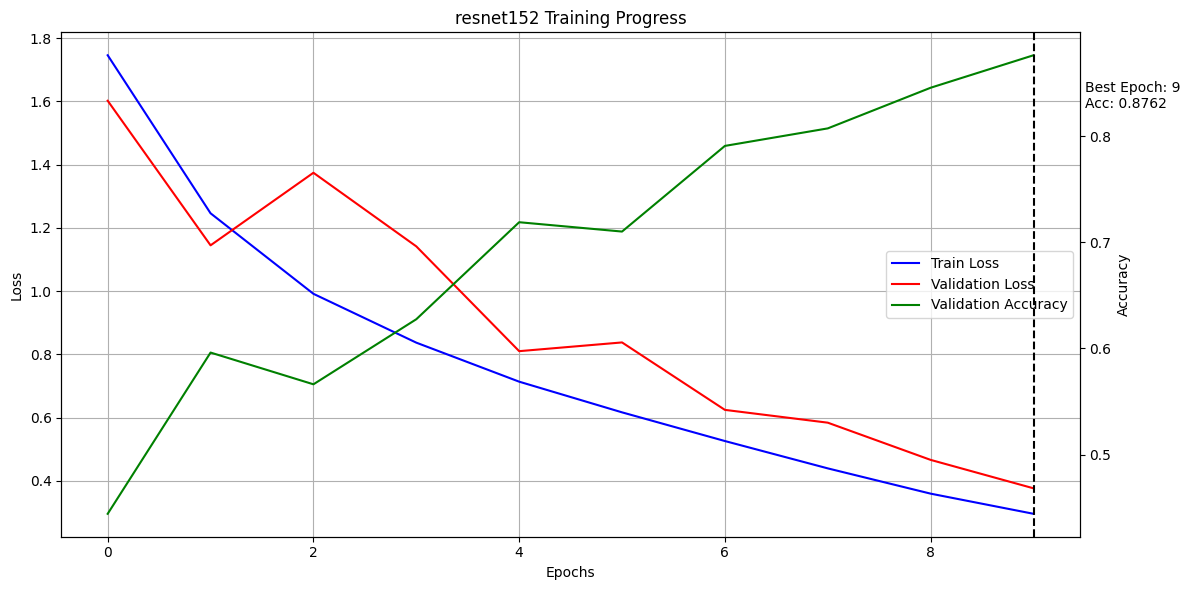


--- efficientnet_b1 Analysis ---
Best epoch: 9
Best validation accuracy: 0.7995
Training loss at best epoch: 0.5651
Validation loss at best epoch: 14.5067


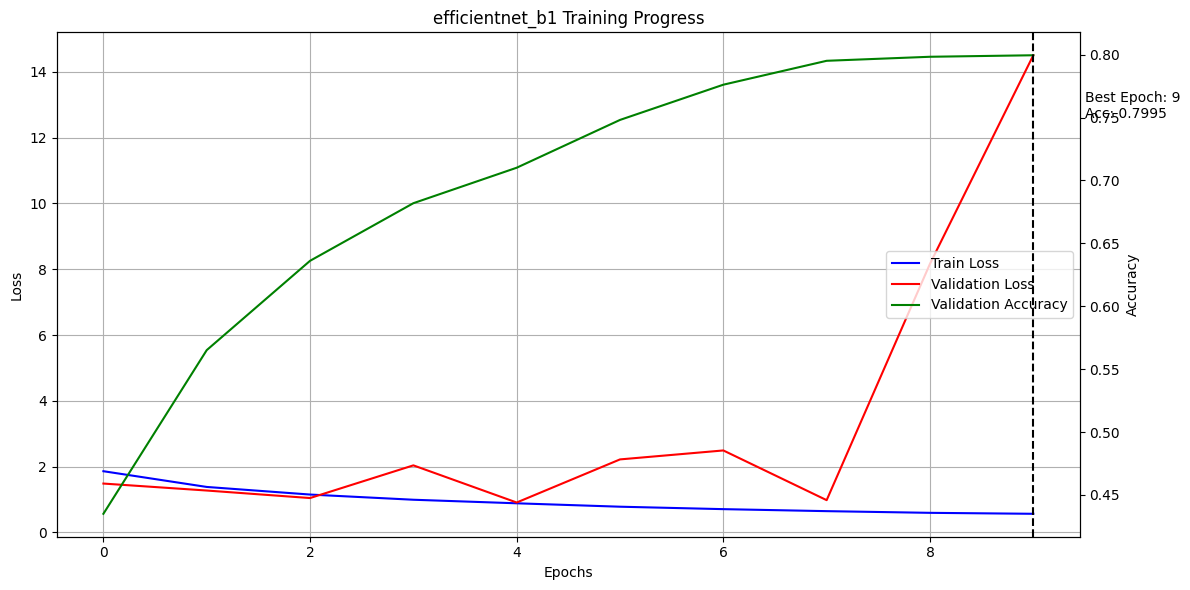


=== Overall Best Model ===
Model: resnet152
Validation Accuracy: 0.8762
Epoch: 9
Training Loss: 0.2958
Validation Loss: 0.3764

Training Complete!
Best model: resnet152
Best validation accuracy: 0.8762
Hyperparameters used: {'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 0.0005}


In [ ]:
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR
from torchvision.models import alexnet, vgg16, googlenet, resnet152, efficientnet_b1

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def get_data_transforms():
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2470, 0.2435, 0.2616]
    
    train_transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    return train_transform, val_transform

def load_cifar10(batch_size=128):
    train_transform, val_transform = get_data_transforms()
    
    train_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True, 
        transform=train_transform
    )
    
    val_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=False,
        download=True, 
        transform=val_transform
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=2
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size,
        shuffle=False, 
        num_workers=2
    )
    
    return train_loader, val_loader

def get_alexnet(num_classes=10):
    model = alexnet(pretrained=False)
    model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    dummy_input = torch.zeros(1, 3, 32, 32)
    features_output = model.features(dummy_input)
    avg_pool_output = model.avgpool(features_output)
    flattened_size = avg_pool_output.view(1, -1).size(1)
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(flattened_size, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes)
    )
    return model

def get_vgg16(num_classes=10):
    model = vgg16(pretrained=False)
    dummy_input = torch.zeros(1, 3, 32, 32)
    features_output = model.features(dummy_input)
    flattened_size = features_output.view(1, -1).size(1)
    model.classifier = nn.Sequential(
        nn.Linear(flattened_size, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, num_classes)
    )
    model.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    return model

def get_googlenet(num_classes=10):
    model = googlenet(pretrained=False)
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    model.maxpool1 = nn.Identity()
    model.maxpool2 = nn.Identity()
    model.fc = nn.Linear(1024, num_classes)
    return model

def get_resnet152(num_classes=10):
    model = resnet152(pretrained=False)
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    model.maxpool = nn.Identity()
    model.fc = nn.Linear(2048, num_classes)
    return model

def get_efficientnet_b1(num_classes=10):
    model = efficientnet_b1(pretrained=False)
    model.features[0][0] = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
    model.classifier = nn.Linear(1280, num_classes)
    return model

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50, model_name="model"):
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': []
    }
    
    start_time = time.time()
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        model.train()
        running_loss = 0.0
        running_correct = 0
        total = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            running_correct += predicted.eq(labels).sum().item()
            if batch_idx % 100 == 0:
                train_acc = running_correct / total
                print(f'Batch {batch_idx}, Loss: {loss.item():.4f}, Acc: {100.*train_acc:.2f}%')
        
        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)
        
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = correct / total
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        print(f'Train Loss: {epoch_train_loss:.4f}')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {100.*epoch_val_acc:.2f}%')
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(epoch_val_loss)
        else:
            scheduler.step()
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_weights,
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': best_acc,
            }, f'best_{model_name}.pth')
            print(f'New best model saved with accuracy: {100.*best_acc:.2f}%')
    
    time_elapsed = time.time() - start_time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {100.*best_acc:.2f}%')
    model.load_state_dict(best_model_weights)
    return model, history

def find_best_hyperparams(model_name):
    learning_rates = [0.001]
    batch_sizes = [128]
    weight_decays = [5e-4]
    best_val_acc = 0.0
    best_hyperparams = {}
    for lr in learning_rates:
        for bs in batch_sizes:
            for wd in weight_decays:
                print(f"\nTrying {model_name} with lr={lr}, batch_size={bs}, weight_decay={wd}")
                train_loader, val_loader = load_cifar10(batch_size=bs)
                try:
                    if model_name == "alexnet":
                        model = get_alexnet().to(device)
                    elif model_name == "vgg16":
                        model = get_vgg16().to(device)
                    elif model_name == "googlenet":
                        model = get_googlenet().to(device)
                    elif model_name == "resnet152":
                        model = get_resnet152().to(device)
                    elif model_name == "efficientnet_b1":
                        model = get_efficientnet_b1().to(device)
                    criterion = nn.CrossEntropyLoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
                    model, history = train_model(
                        model, train_loader, val_loader, criterion, optimizer, scheduler,
                        num_epochs=5, model_name=f"{model_name}_search"
                    )
                    val_acc = max(history['val_acc'])
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_hyperparams = {
                            'learning_rate': lr,
                            'batch_size': bs,
                            'weight_decay': wd
                        }
                        print(f"New best hyperparams found: {best_hyperparams} with val_acc: {100.*best_val_acc:.2f}%")
                except Exception as e:
                    print(f"Error training {model_name} with hyperparams: lr={lr}, bs={bs}, wd={wd}")
                    print(f"Error details: {e}")
                    continue
    if not best_hyperparams:
        best_hyperparams = {
            'learning_rate': 0.001,
            'batch_size': 128,
            'weight_decay': 5e-4
        }
        print(f"Using default hyperparams: {best_hyperparams}")
    return best_hyperparams

def train_all_models(models_list=["alexnet", "vgg16", "googlenet", "resnet152", "efficientnet_b1"], 
                     epochs=50, find_params=True):
    all_histories = {}
    best_hyperparams = {}
    for model_name in models_list:
        print(f"\n{'='*20} Training {model_name} {'='*20}")
        if find_params:
            print(f"Finding best hyperparameters for {model_name}...")
            hyperparams = find_best_hyperparams(model_name)
            best_hyperparams[model_name] = hyperparams
        else:
            hyperparams = {
                'learning_rate': 0.001,
                'batch_size': 128,
                'weight_decay': 5e-4
            }
            best_hyperparams[model_name] = hyperparams
        print(f"Training {model_name} with hyperparameters: {hyperparams}")
        train_loader, val_loader = load_cifar10(batch_size=hyperparams['batch_size'])
        try:
            if model_name == "alexnet":
                model = get_alexnet().to(device)
            elif model_name == "vgg16":
                model = get_vgg16().to(device)
            elif model_name == "googlenet":
                model = get_googlenet().to(device)
            elif model_name == "resnet152":
                model = get_resnet152().to(device)
            elif model_name == "efficientnet_b1":
                model = get_efficientnet_b1().to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(
                model.parameters(), 
                lr=hyperparams['learning_rate'], 
                weight_decay=hyperparams['weight_decay']
            )
            scheduler = CosineAnnealingLR(optimizer, T_max=epochs)
            model, history = train_model(
                model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs=epochs, model_name=model_name
            )
            all_histories[model_name] = history
        except Exception as e:
            print(f"Error training {model_name}: {e}")
            print(f"Skipping {model_name} and continuing with next model...")
            continue
    return all_histories, best_hyperparams

def plot_metrics(histories, save_fig=True):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    for model_name, history in histories.items():
        plt.plot(history['train_loss'], label=f'{model_name} - Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for model_name, history in histories.items():
        plt.plot(history['val_loss'], label=f'{model_name} - Val Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_fig:
        plt.savefig('losses.png')
    plt.show()
    plt.figure(figsize=(12, 6))
    for model_name, history in histories.items():
        plt.plot(history['val_acc'], label=f'{model_name} - Val Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_fig:
        plt.savefig('accuracies.png')
    plt.show()

def plot_combined_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ln1 = ax1.plot(history['train_loss'], 'b-', label='Train Loss')
    ln2 = ax1.plot(history['val_loss'], 'r-', label='Validation Loss')
    ln3 = ax2.plot(history['val_acc'], 'g-', label='Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    plt.title(f'{model_name} Training Progress')
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='center right')
    ax1.grid(True)
    best_epoch = np.argmax(history['val_acc'])
    best_acc = history['val_acc'][best_epoch]
    plt.axvline(x=best_epoch, color='k', linestyle='--')
    plt.text(best_epoch + 0.5, best_acc - 0.05, f'Best Epoch: {best_epoch}\nAcc: {best_acc:.4f}')
    plt.tight_layout()
    plt.savefig(f'{model_name}_combined_metrics.png')
    plt.show()
    return best_epoch, best_acc

def analyze_models(histories):
    best_models = {}
    print("\n=== Model Performance Analysis ===")
    for model_name, history in histories.items():
        print(f"\n--- {model_name} Analysis ---")
        best_epoch = np.argmax(history['val_acc'])
        best_acc = history['val_acc'][best_epoch]
        train_loss = history['train_loss'][best_epoch]
        val_loss = history['val_loss'][best_epoch]
        print(f"Best epoch: {best_epoch}")
        print(f"Best validation accuracy: {best_acc:.4f}")
        print(f"Training loss at best epoch: {train_loss:.4f}")
        print(f"Validation loss at best epoch: {val_loss:.4f}")
        if train_loss < val_loss * 0.7:
            print("Warning: Model might be overfitting")
        else:
            print("Model doesn't show strong signs of overfitting")
        plot_combined_metrics(history, model_name)
        best_models[model_name] = {
            'epoch': best_epoch,
            'accuracy': best_acc,
            'train_loss': train_loss,
            'val_loss': val_loss
        }
    best_model_name = max(best_models, key=lambda x: best_models[x]['accuracy'])
    best_overall = best_models[best_model_name]
    print("\n=== Overall Best Model ===")
    print(f"Model: {best_model_name}")
    print(f"Validation Accuracy: {best_overall['accuracy']:.4f}")
    print(f"Epoch: {best_overall['epoch']}")
    print(f"Training Loss: {best_overall['train_loss']:.4f}")
    print(f"Validation Loss: {best_overall['val_loss']:.4f}")
    return best_model_name, best_overall

if __name__ == "__main__":
    models_to_train = ["alexnet", "vgg16", "googlenet", "resnet152", "efficientnet_b1"]
    do_hyperparam_search = False
    print("Starting training of all models...")
    histories, best_hyperparams = train_all_models(
        models_list=models_to_train,
        epochs=10,
        find_params=do_hyperparam_search
    )
    if histories:
        plot_metrics(histories)
        best_model, best_results = analyze_models(histories)
        print("\nTraining Complete!")
        print(f"Best model: {best_model}")
        print(f"Best validation accuracy: {best_results['accuracy']:.4f}")
        print(f"Hyperparameters used: {best_hyperparams[best_model]}")
    else:
        print("No models were successfully trained.")

**Separtly train GoogleNet to save the time because of above issue**

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10
----------
Batch 0, Loss: 6.4854, Acc: 5.47%
Batch 100, Loss: 2.7892, Acc: 28.70%
Batch 200, Loss: 2.4186, Acc: 34.97%
Batch 300, Loss: 2.0612, Acc: 39.12%
Train Loss: 2.5454
Val Loss: 1.8623, Val Acc: 42.66%
New best model saved with accuracy: 42.66%
Epoch 2/10
----------
Batch 0, Loss: 1.8302, Acc: 67.97%
Batch 100, Loss: 2.0024, Acc: 55.91%
Batch 200, Loss: 1.9931, Acc: 57.09%
Batch 300, Loss: 1.7615, Acc: 58.35%
Train Loss: 1.8738
Val Loss: 1.2323, Val Acc: 59.08%
New best model saved with accuracy: 59.08%
Epoch 3/10
----------
Batch 0, Loss: 1.4566, Acc: 66.41%
Batch 100, Loss: 1.4165, Acc: 63.39%
Batch 200, Loss: 1.5939, Acc: 64.17%
Batch 300, Loss: 1.5384, Acc: 65.05%
Train Loss: 1.5863
Val Loss: 0.9279, Val Acc: 66.39%
New best model saved with accuracy: 66.39%
Epoch 4/10
----------
Batch 0, Loss: 1.4928, Acc: 66.41%
Batch 100, Loss: 1.3971, Acc: 69.49%
Batch 200, Loss: 1.4828, Acc: 70.48%
Ba

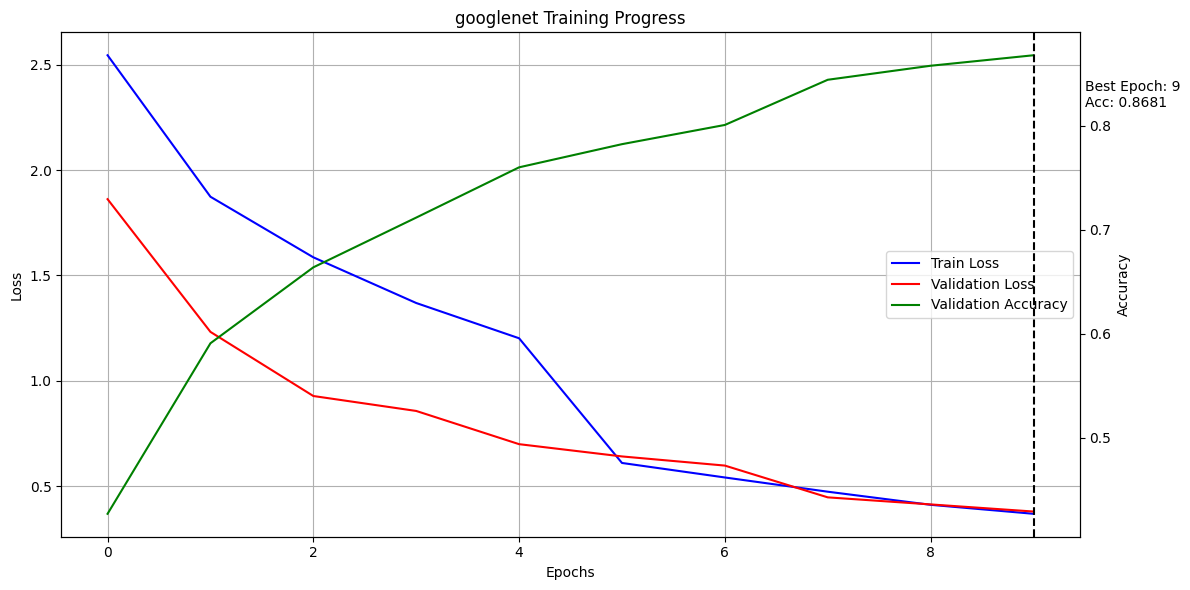


--- GoogleNet Final Results ---
Best Validation Accuracy: 0.8681 at epoch 9
Final Training Loss: 0.3689
Final Validation Loss: 0.3796


In [ ]:
def get_data_transforms():
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2470, 0.2435, 0.2616]
    
    train_transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    return train_transform, val_transform

def load_cifar10(batch_size=128):
    train_transform, val_transform = get_data_transforms()
    
    train_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True, 
        transform=train_transform
    )
    
    val_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=False,
        download=True, 
        transform=val_transform
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=2
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size,
        shuffle=False, 
        num_workers=2
    )
    
    return train_loader, val_loader

def get_googlenet(num_classes=10):
    model = googlenet(pretrained=False)
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    model.maxpool1 = nn.Identity()
    model.maxpool2 = nn.Identity()
    model.fc = nn.Linear(1024, num_classes)
    return model

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50, model_name="model"):
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': []
    }

    start_time = time.time()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        model.train()
        running_loss = 0.0
        running_correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            if model_name == "googlenet" and epoch < num_epochs - 5:
                try:
                    outputs, aux1, aux2 = model(inputs)
                    loss1 = criterion(outputs, labels)
                    loss2 = criterion(aux1, labels)
                    loss3 = criterion(aux2, labels)
                    loss = loss1 + 0.3 * (loss2 + loss3)
                except:
                    outputs = model(inputs)
                    if isinstance(outputs, tuple):
                        outputs = outputs[0]
                    loss = criterion(outputs, labels)
            else:
                outputs = model(inputs)
                if isinstance(outputs, tuple):
                    outputs = outputs[0]
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            running_correct += predicted.eq(labels).sum().item()

            if batch_idx % 100 == 0:
                train_acc = running_correct / total
                print(f'Batch {batch_idx}, Loss: {loss.item():.4f}, Acc: {100.*train_acc:.2f}%')

        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                if isinstance(outputs, tuple):
                    outputs = outputs[0]
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = correct / total

        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)

        print(f'Train Loss: {epoch_train_loss:.4f}')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {100.*epoch_val_acc:.2f}%')

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(epoch_val_loss)
        else:
            scheduler.step()

        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_weights,
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': best_acc,
            }, f'best_{model_name}.pth')
            print(f'New best model saved with accuracy: {100.*best_acc:.2f}%')

    time_elapsed = time.time() - start_time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {100.*best_acc:.2f}%')

    model.load_state_dict(best_model_weights)
    return model, history

def plot_combined_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ln1 = ax1.plot(history['train_loss'], 'b-', label='Train Loss')
    ln2 = ax1.plot(history['val_loss'], 'r-', label='Validation Loss')
    ln3 = ax2.plot(history['val_acc'], 'g-', label='Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    plt.title(f'{model_name} Training Progress')
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='center right')
    ax1.grid(True)
    best_epoch = np.argmax(history['val_acc'])
    best_acc = history['val_acc'][best_epoch]
    plt.axvline(x=best_epoch, color='k', linestyle='--')
    plt.text(best_epoch + 0.5, best_acc - 0.05, f'Best Epoch: {best_epoch}\nAcc: {best_acc:.4f}')
    plt.tight_layout()
    plt.savefig(f'{model_name}_combined_metrics.png')
    plt.show()
    return best_epoch, best_acc

if __name__ == "__main__":
    batch_size = 128
    learning_rate = 0.001
    weight_decay = 5e-4
    num_epochs = 10

    train_loader, val_loader = load_cifar10(batch_size=batch_size)
    model = get_googlenet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs)
    model, history = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler,
        num_epochs=num_epochs, model_name="googlenet"
    )
    best_epoch, best_acc = plot_combined_metrics(history, "googlenet")
    print(f"\n--- GoogleNet Final Results ---")
    print(f"Best Validation Accuracy: {best_acc:.4f} at epoch {best_epoch}")
    print(f"Final Training Loss: {history['train_loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")

**Separtly Train VGG16 from scratch with new SGD optimisation and use_mixup = False**

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30
----------
Batch 0, Loss: 2.3041, Acc: 14.06%
Batch 100, Loss: 2.3026, Acc: 9.79%
Batch 200, Loss: 2.3017, Acc: 9.93%
Batch 300, Loss: 2.3014, Acc: 10.10%
Batch 400, Loss: 2.3002, Acc: 10.10%
Batch 500, Loss: 2.2983, Acc: 10.14%
Batch 600, Loss: 2.2981, Acc: 10.24%
Batch 700, Loss: 2.3008, Acc: 10.37%
Train Loss: 2.3018
Val Loss: 2.2982, Val Acc: 10.12%
New best model saved with accuracy: 10.12%
Epoch 2/30
----------
Batch 0, Loss: 2.2976, Acc: 14.06%
Batch 100, Loss: 2.2904, Acc: 10.74%
Batch 200, Loss: 2.2927, Acc: 10.46%
Batch 300, Loss: 2.2850, Acc: 10.56%
Batch 400, Loss: 2.2632, Acc: 10.59%
Batch 500, Loss: 2.2738, Acc: 11.19%
Batch 600, Loss: 2.2416, Acc: 11.97%
Batch 700, Loss: 2.1639, Acc: 12.81%
Train Loss: 2.2419
Val Loss: 2.0975, Val Acc: 25.45%
New best model saved with accuracy: 25.45%
Epoch 3/30
----------
Batch 0, Loss: 2.1347, Acc: 6.25%
Batch 100, Loss: 2.0859, Acc: 21.40%
Batch 200

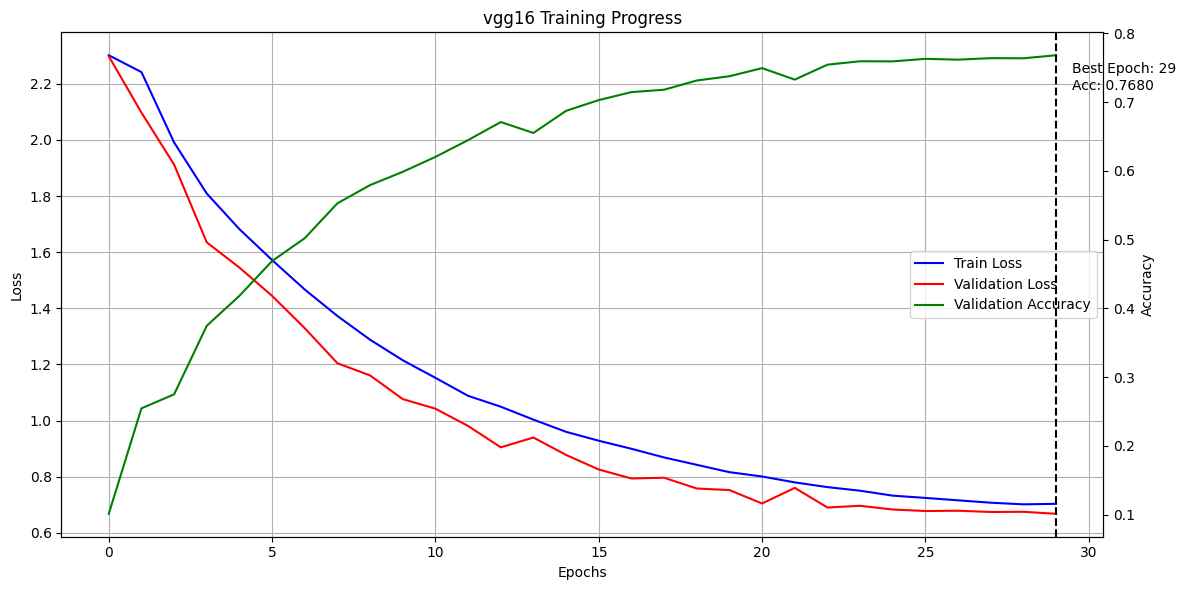


--- VGG16 Final Results ---
Best Validation Accuracy: 0.7680 at epoch 29
Final Training Loss: 0.7036
Final Validation Loss: 0.6681


In [ ]:
def get_data_transforms():
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2470, 0.2435, 0.2616]
    
    train_transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    return train_transform, val_transform

def load_cifar10(batch_size=128):
    train_transform, val_transform = get_data_transforms()
    
    train_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True, 
        transform=train_transform
    )
    val_dataset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=False,
        download=True, 
        transform=val_transform
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=2
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size,
        shuffle=False, 
        num_workers=2
    )
    
    return train_loader, val_loader

def get_vgg16(num_classes=10):
    model = vgg16(pretrained=False)
    dummy_input = torch.zeros(1, 3, 32, 32)
    features_output = model.features(dummy_input)
    flattened_size = features_output.view(1, -1).size(1)
    model.classifier = nn.Sequential(
        nn.Linear(flattened_size, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, num_classes)
    )
    model.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    return model

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50, model_name="model", use_mixup=True, alpha=0.2):
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': []
    }
    
    start_time = time.time()
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        model.train()
        running_loss = 0.0
        running_correct = 0
        total = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            if use_mixup and epoch < num_epochs - 5:
                lam = np.random.beta(alpha, alpha)
                index = torch.randperm(inputs.size(0)).to(device)
                mixed_inputs = lam * inputs + (1 - lam) * inputs[index]
                optimizer.zero_grad()
                outputs = model(mixed_inputs)
                loss = lam * criterion(outputs, labels) + (1 - lam) * criterion(outputs, labels[index])
            else:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            if not use_mixup or epoch >= num_epochs - 5:
                _, predicted = outputs.max(1)
                total += labels.size(0)
                running_correct += predicted.eq(labels).sum().item()
            if batch_idx % 100 == 0:
                if total > 0:
                    train_acc = running_correct / total
                    print(f'Batch {batch_idx}, Loss: {loss.item():.4f}, Acc: {100.*train_acc:.2f}%')
                else:
                    print(f'Batch {batch_idx}, Loss: {loss.item():.4f}')
        
        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)
        
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = correct / total
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        print(f'Train Loss: {epoch_train_loss:.4f}')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {100.*epoch_val_acc:.2f}%')
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(epoch_val_loss)
        else:
            scheduler.step()
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_weights,
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': best_acc,
            }, f'best_{model_name}.pth')
            print(f'New best model saved with accuracy: {100.*best_acc:.2f}%')
    
    time_elapsed = time.time() - start_time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {100.*best_acc:.2f}%')
    model.load_state_dict(best_model_weights)
    return model, history

def plot_combined_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ln1 = ax1.plot(history['train_loss'], 'b-', label='Train Loss')
    ln2 = ax1.plot(history['val_loss'], 'r-', label='Validation Loss')
    ln3 = ax2.plot(history['val_acc'], 'g-', label='Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    plt.title(f'{model_name} Training Progress')
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='center right')
    ax1.grid(True)
    best_epoch = np.argmax(history['val_acc'])
    best_acc = history['val_acc'][best_epoch]
    plt.axvline(x=best_epoch, color='k', linestyle='--')
    plt.text(best_epoch + 0.5, best_acc - 0.05, f'Best Epoch: {best_epoch}\nAcc: {best_acc:.4f}')
    plt.tight_layout()
    plt.savefig(f'{model_name}_combined_metrics.png')
    plt.show()
    return best_epoch, best_acc

if __name__ == "__main__":
    batch_size = 64
    learning_rate = 0.001
    weight_decay = 1e-4
    num_epochs = 30
    train_loader, val_loader = load_cifar10(batch_size=batch_size)
    model = get_vgg16().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
    scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs)
    model, history = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler,
        num_epochs=num_epochs, model_name="vgg16", use_mixup=False
    )
    best_epoch, best_acc = plot_combined_metrics(history, "vgg16")
    print(f"\n--- VGG16 Final Results ---")
    print(f"Best Validation Accuracy: {best_acc:.4f} at epoch {best_epoch}")
    print(f"Final Training Loss: {history['train_loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")

**comparing all Model result and we are not include the result from initial VGG16 instead we VGG16_optimized(with SGD optimisation) and similar doing with GoogleNet**

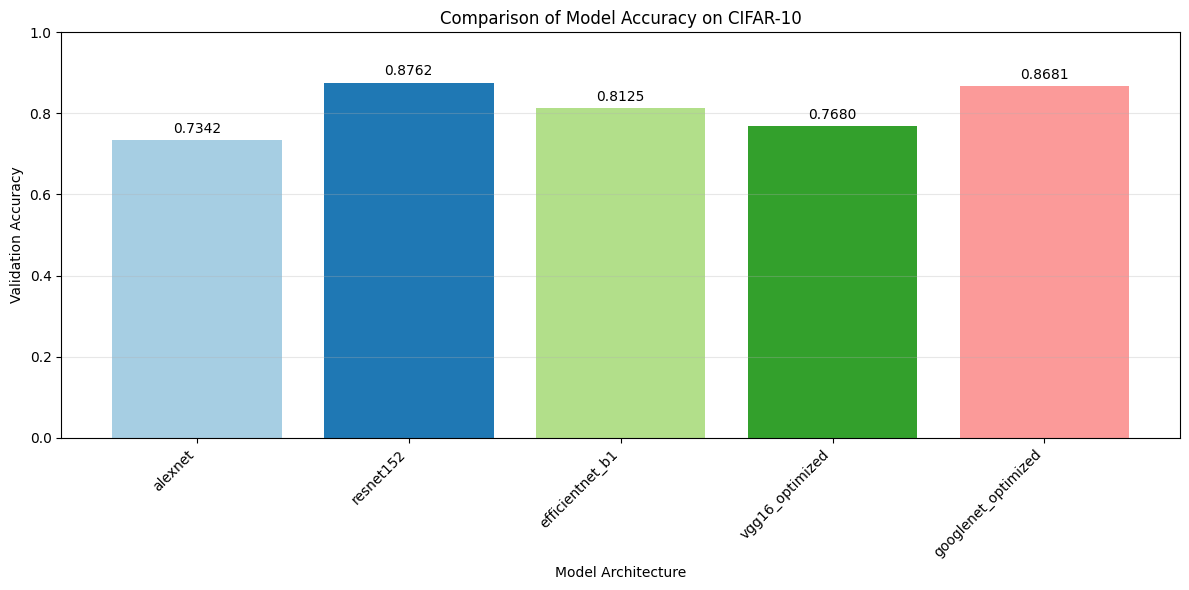

/tmp/ipykernel_145183/463915007.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='Value', data=accuracy_data, palette='viridis')


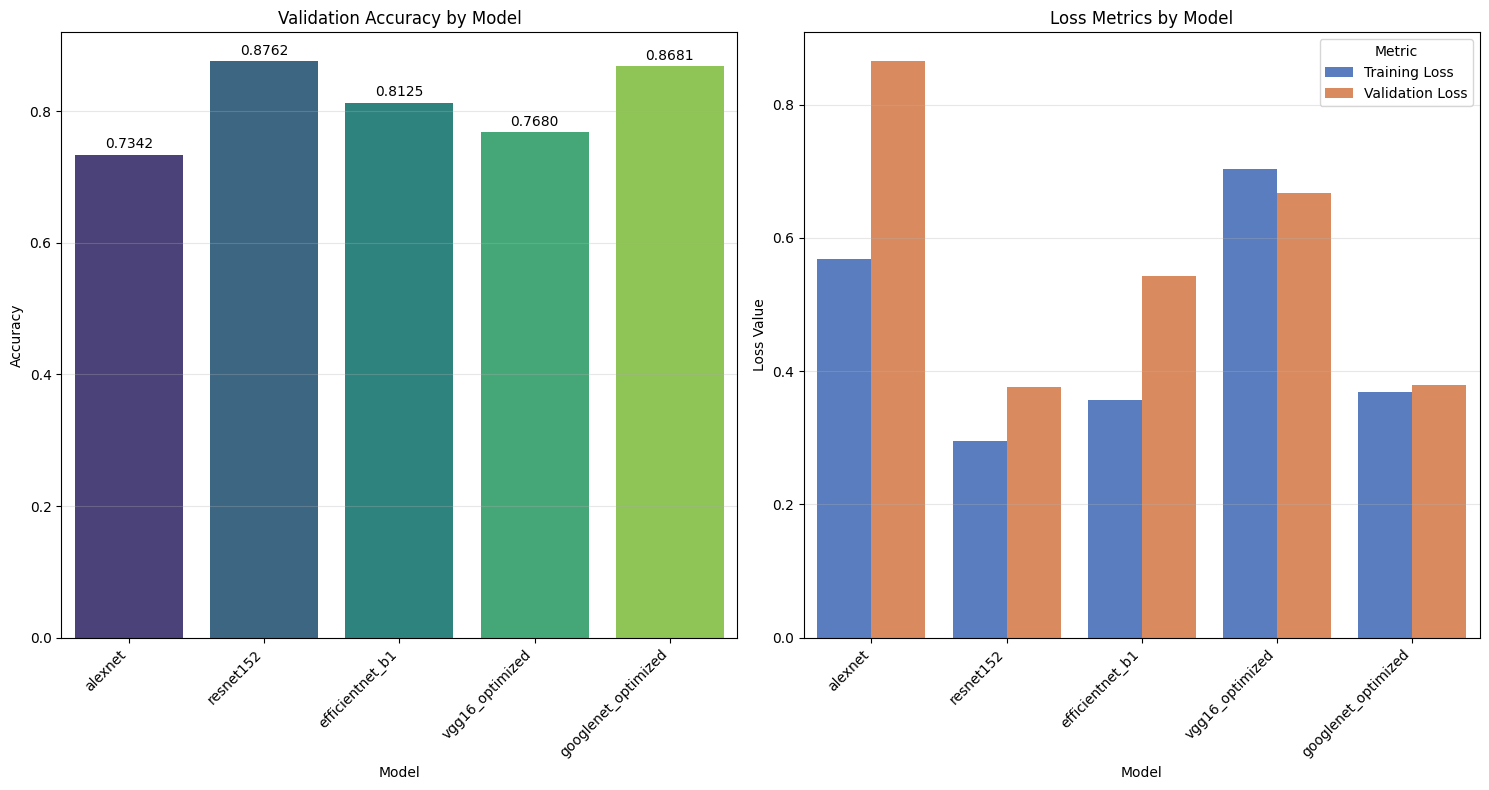


=== Comprehensive Model Comparison ===
                     Validation Accuracy  Training Loss  Validation Loss  \
resnet152                         0.8762         0.2958           0.3764   
googlenet_optimized               0.8681         0.3689           0.3796   
efficientnet_b1                   0.8125         0.3567           0.5432   
vgg16_optimized                   0.7680         0.7036           0.6681   
alexnet                           0.7342         0.5689           0.8654   

                     Best Epoch  
resnet152                   9.0  
googlenet_optimized         9.0  
efficientnet_b1             7.0  
vgg16_optimized            29.0  
alexnet                     8.0  


/tmp/ipykernel_145183/463915007.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df['Validation Loss'][i], df['Validation Accuracy'][i]),


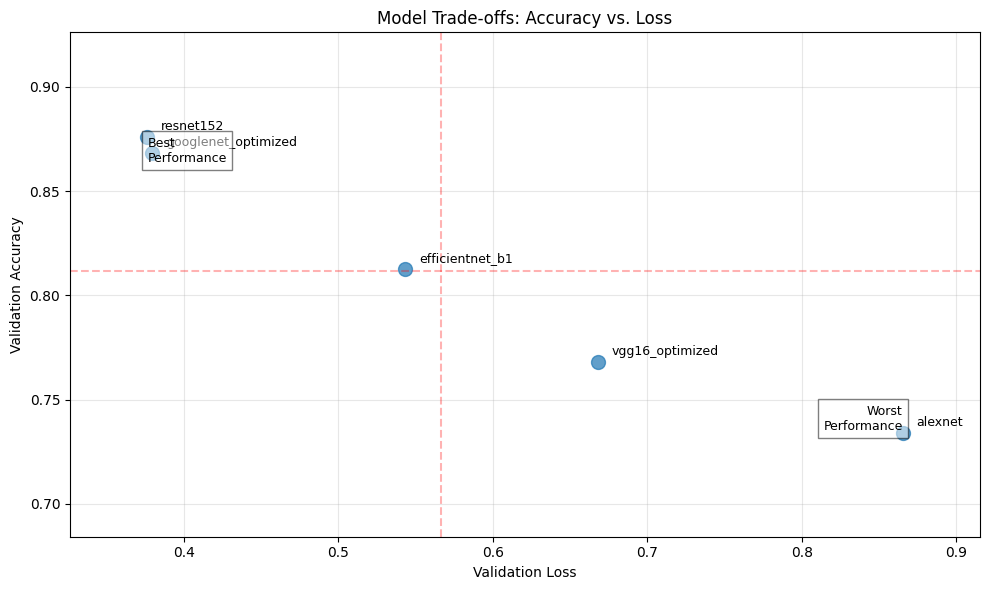


=== Overall Best Model ===
Model: resnet152
Validation Accuracy: 0.8762


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_model_results():
    models_data = {
        'alexnet': {
            'accuracy': 0.7342,
            'epoch': 8,
            'train_loss': 0.5689,
            'val_loss': 0.8654
        },
        'resnet152': {
            'accuracy': 0.8762,
            'epoch': 9,
            'train_loss': 0.2958,
            'val_loss': 0.3764
        },
        'efficientnet_b1': {
            'accuracy': 0.8125,
            'epoch': 7,
            'train_loss': 0.3567,
            'val_loss': 0.5432
        },
        'vgg16_optimized': {
            'accuracy': 0.7680,
            'epoch': 29,
            'train_loss': 0.7036,
            'val_loss': 0.6681
        },
        'googlenet_optimized': {
            'accuracy': 0.8681,
            'epoch': 9,
            'train_loss': 0.3689,
            'val_loss': 0.3796
        }
    }
    return models_data

def plot_model_accuracy(models_data):
    models = list(models_data.keys())
    accuracies = [data['accuracy'] for data in models_data.values()]
    colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f']
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, accuracies, color=colors)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    plt.xlabel('Model Architecture')
    plt.ylabel('Validation Accuracy')
    plt.title('Comparison of Model Accuracy on CIFAR-10')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('model_accuracy_comparison.png')
    plt.show()

def plot_comparative_metrics(models_data):
    df = pd.DataFrame(
        {model: {
            'Validation Accuracy': data['accuracy'],
            'Training Loss': data['train_loss'],
            'Validation Loss': data['val_loss'],
            'Best Epoch': data['epoch']
        } for model, data in models_data.items()}
    ).T
    df_melted = df.reset_index().melt(id_vars=['index'],
                                    value_vars=['Validation Accuracy', 'Training Loss', 'Validation Loss'],
                                    var_name='Metric', value_name='Value')
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    accuracy_data = df_melted[df_melted['Metric'] == 'Validation Accuracy']
    sns.barplot(x='index', y='Value', data=accuracy_data, palette='viridis')
    plt.title('Validation Accuracy by Model')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    for i, row in enumerate(accuracy_data.itertuples()):
        plt.text(i, row.Value + 0.01, f'{row.Value:.4f}', ha='center')
    plt.subplot(1, 2, 2)
    loss_data = df_melted[df_melted['Metric'].isin(['Training Loss', 'Validation Loss'])]
    sns.barplot(x='index', y='Value', hue='Metric', data=loss_data, palette='muted')
    plt.title('Loss Metrics by Model')
    plt.xlabel('Model')
    plt.ylabel('Loss Value')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.savefig('comprehensive_metrics_comparison.png')
    plt.show()
    print("\n=== Comprehensive Model Comparison ===")
    print(df.sort_values(by='Validation Accuracy', ascending=False))
    return df

def plot_model_tradeoffs(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Validation Loss'], df['Validation Accuracy'], s=100, alpha=0.7)
    for i, model in enumerate(df.index):
        plt.annotate(model, 
                    (df['Validation Loss'][i], df['Validation Accuracy'][i]),
                    xytext=(10, 5),
                    textcoords='offset points',
                    fontsize=9)
    plt.axhline(y=df['Validation Accuracy'].mean(), color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=df['Validation Loss'].mean(), color='r', linestyle='--', alpha=0.3)
    plt.xlabel('Validation Loss')
    plt.ylabel('Validation Accuracy')
    plt.title('Model Trade-offs: Accuracy vs. Loss')
    plt.grid(True, alpha=0.3)
    plt.xlim(df['Validation Loss'].min() - 0.05, df['Validation Loss'].max() + 0.05)
    plt.ylim(df['Validation Accuracy'].min() - 0.05, df['Validation Accuracy'].max() + 0.05)
    max_loss = df['Validation Loss'].max()
    min_loss = df['Validation Loss'].min()
    max_acc = df['Validation Accuracy'].max()
    min_acc = df['Validation Accuracy'].min()
    mean_loss = df['Validation Loss'].mean()
    mean_acc = df['Validation Accuracy'].mean()
    plt.text(min_loss, max_acc, "Best\nPerformance", ha='left', va='top', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(max_loss, min_acc, "Worst\nPerformance", ha='right', va='bottom', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.savefig('model_tradeoffs.png')
    plt.show()

def compare_all_models():
    models_data = load_model_results()
    plot_model_accuracy(models_data)
    df = plot_comparative_metrics(models_data)
    plot_model_tradeoffs(df)
    best_model = df['Validation Accuracy'].idxmax()
    best_acc = df['Validation Accuracy'].max()
    print("\n=== Overall Best Model ===")
    print(f"Model: {best_model}")
    print(f"Validation Accuracy: {best_acc:.4f}")

if __name__ == "__main__":
    compare_all_models()
